# Blood Transfusion Service Center Data Set


## Attribute Information:
* R (Recency - months since last donation), 
* F (Frequency - total number of donation), 
* M (Monetary - total blood donated in c.c.), 
* T (Time - months since first donation), and
* a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood). 


In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"
names = ['Buying','Maint','Doors','Persons','Lug_Boot','Safety']
dataset = pd.read_csv(url)

In [73]:
dataset.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [74]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,4].values

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

## Escalado de características

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Entrenamiento y Predicciones

In [78]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [79]:
Y_pre = classifier.predict(X_test)
Y_pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

## Evaluación del modelo

In [81]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,Y_pre))
print(classification_report(Y_test,Y_pre))

[[109  12]
 [ 17  12]]
             precision    recall  f1-score   support

          0       0.87      0.90      0.88       121
          1       0.50      0.41      0.45        29

avg / total       0.79      0.81      0.80       150



## Comparación de la tasa de error con el valor de K

In [83]:
error = []

for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0,0.5,'Mean Error')

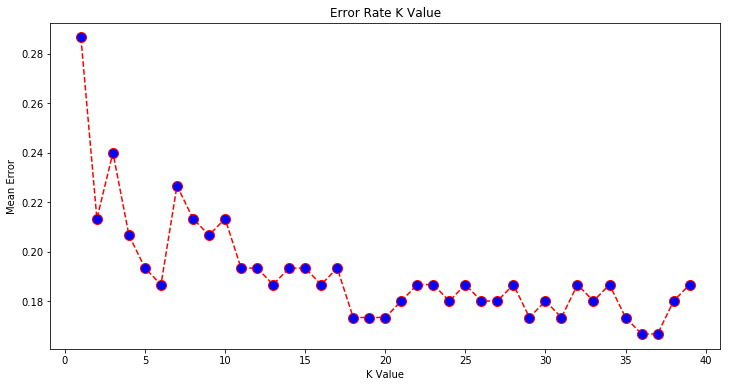

In [84]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

## Entrenar con  K = 36

In [95]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 36)
classifier.fit(X_train,Y_train)
Y_pre = classifier.predict(X_test)

In [96]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,Y_pre))
print(classification_report(Y_test,Y_pre))

[[115   6]
 [ 19  10]]
             precision    recall  f1-score   support

          0       0.86      0.95      0.90       121
          1       0.62      0.34      0.44        29

avg / total       0.81      0.83      0.81       150

